In [ ]:
import pyvista as pv
import vtk
import math
import numpy as np
import matplotlib.pyplot as plt


def trans_to_matrix(trans):
    """ Convert a numpy.ndarray to a vtk.vtkMatrix4x4 """
    matrix = vtk.vtkMatrix4x4()
    for i in range(trans.shape[0]):
        for j in range(trans.shape[1]):
            matrix.SetElement(i, j, trans[i, j])
    return matrix

def main():
    w = 256 
    h = 256

    intrinsic = np.array([[665.10751011,   0.        , 511.5],
                          [  0.        , 665.10751011, 383.5],
                          [  0.        ,   0.        ,   1. ]])

    extrinsic = np.array([[ 0.95038793,  0.0954125 , -0.29607301, -1.84295291],
                          [-0.1222884 ,  0.98976322, -0.07358197, -1.2214318 ],
                          [ 0.28602154,  0.10613772,  0.95232687,  0.6428006 ],
                          [ 0.        ,  0.        ,  0.        ,  1.        ]])


    # renderer
    p = pv.Plotter(off_screen=True, window_size=[w,h])


    #
    # load mesh or point cloud
    #
    mesh = pv.read("fragment.ply")
    p.add_mesh(mesh, rgb=True)


    #
    # intrinsics
    #

    cx = intrinsic[0,2]
    cy = intrinsic[1,2]
    f = intrinsic[0,0]

    # convert the principal point to window center (normalized coordinate system) and set it
    wcx = -2*(cx - float(w)/2) / w
    wcy =  2*(cy - float(h)/2) / h
    p.camera.SetWindowCenter(wcx, wcy)

    # convert the focal length to view angle and set it
    view_angle = 180 / math.pi * (2.0 * math.atan2(h/2.0, f))
    p.camera.SetViewAngle(view_angle)


    #
    # extrinsics
    #

    # apply the transform to scene objects
    p.camera.SetModelTransformMatrix(trans_to_matrix(extrinsic))

    # the camera can stay at the origin because we are transforming the scene objects
    p.camera.SetPosition(0, 0, 0)

    # look in the +Z direction of the camera coordinate system
    p.camera.SetFocalPoint(0, 0, 1)

    # the camera Y axis points down
    p.camera.SetViewUp(0,-1,0)


    #
    # near/far plane
    #

    # ensure the relevant range of depths are rendered
    # depth_min = 0.1
    # depth_max = 100
    # p.camera.SetClippingRange(depth_min, depth_max)
    # # depth_min, depth_max = p.camera.GetClippingRange()
    p.renderer.ResetCameraClippingRange()

    # p.show()
    # p.render()
    p.store_image = True  # last_image and last_image_depth
    p.close()


    # get screen image
    img = p.last_image

    # get depth
    # img = p.get_image_depth(fill_value=np.nan, reset_camera_clipping_range=False)
    img = p.last_image_depth

    plt.figure()
    plt.imshow(img)
    plt.colorbar(label='Distance to Camera')
    plt.title('Depth image')
    plt.xlabel('X Pixel')
    plt.ylabel('Y Pixel')
    plt.show()


if __name__ == "__main__":
    main()


[[ 0.95038793  0.0954125  -0.29607301 -1.84295291]
 [-0.1222884   0.98976322 -0.07358197 -1.2214318 ]
 [ 0.28602154  0.10613772  0.95232687  0.6428006 ]
 [ 0.          0.          0.          1.        ]]


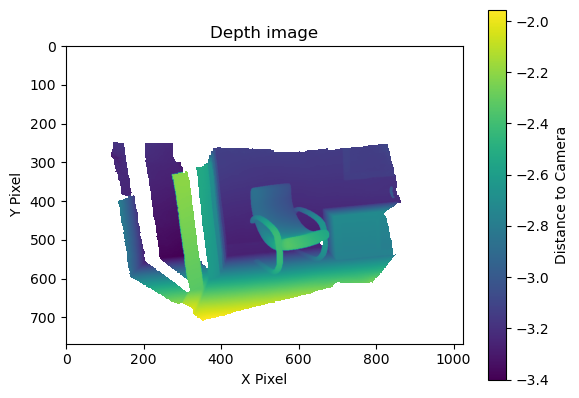

In [4]:
#  Create Depth map
import pyvista as pv
import vtk
import math
import numpy as np
import matplotlib.pyplot as plt


def trans_to_matrix(trans):
    """ Convert a numpy.ndarray to a vtk.vtkMatrix4x4 """
    matrix = vtk.vtkMatrix4x4()
    for i in range(trans.shape[0]):
        for j in range(trans.shape[1]):
            matrix.SetElement(i, j, trans[i, j])
    return matrix

def main():
    w = 1024
    h = 768

    intrinsic = np.array([[665.10751011,   0.        , 511.5],
                          [  0.        , 665.10751011, 383.5],
                          [  0.        ,   0.        ,   1. ]])

    extrinsic = np.array([[ 0.95038793,  0.0954125 , -0.29607301, -1.84295291],
                          [-0.1222884 ,  0.98976322, -0.07358197, -1.2214318 ],
                          [ 0.28602154,  0.10613772,  0.95232687,  0.6428006 ],
                          [ 0.        ,  0.        ,  0.        ,  1.        ]])


    # renderer
    p = pv.Plotter(off_screen=True, window_size=[w,h])


    #
    # load mesh or point cloud
    #
    mesh = pv.read("data/fragment.ply")
    p.add_mesh(mesh, rgb=True)


    #
    # intrinsics
    #

    cx = intrinsic[0,2]
    cy = intrinsic[1,2]
    f = intrinsic[0,0]

    # convert the principal point to window center (normalized coordinate system) and set it
    wcx = -2*(cx - float(w)/2) / w
    wcy =  2*(cy - float(h)/2) / h
    p.camera.SetWindowCenter(wcx, wcy)

    # convert the focal length to view angle and set it
    view_angle = 180 / math.pi * (2.0 * math.atan2(h/2.0, f))
    p.camera.SetViewAngle(view_angle)


    #
    # extrinsics
    #

    # apply the transform to scene objects
    p.camera.SetModelTransformMatrix(trans_to_matrix(extrinsic))

    # the camera can stay at the origin because we are transforming the scene objects
    p.camera.SetPosition(0, 0, 0)

    # look in the +Z direction of the camera coordinate system
    p.camera.SetFocalPoint(0, 0, 1)

    # the camera Y axis points down
    p.camera.SetViewUp(0,-1,0)

  
    #
    # near/far plane
    #

    # ensure the relevant range of depths are rendered
    # depth_min = 0.1
    # depth_max = 100
    # p.camera.SetClippingRange(depth_min, depth_max)
    # # depth_min, depth_max = p.camera.GetClippingRange()
    p.renderer.ResetCameraClippingRange()

    # p.show()
    # p.render()
    p.store_image = True  # last_image and last_image_depth
    p.close()


    # get screen image
    img = p.last_image

    # get depth
    # img = p.get_image_depth(fill_value=0.0, reset_camera_clipping_range=False)
    img = p.last_image_depth


    plt.figure()
    plt.imshow(img)
    plt.colorbar(label='Distance to Camera')
    plt.title('Depth image')
    plt.xlabel('X Pixel')
    plt.ylabel('Y Pixel')
    plt.show()


if __name__ == "__main__":
    main()